## Project Overview
This project is regarding data analysis, which uses \'Walmart Retail Sales\' dataset from Kaggle. The dataset includes the following:

1. Store - the store number

2. Date - the week of sales

3. Weekly_Sales - sales for the given store

4. Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

5. Temperature - Temperature on the day of sale

6. Fuel_Price - Cost of fuel in the region

7. CPI – Prevailing consumer price index

8. Unemployment - Prevailing unemployment rate

 We are going to do the following:

#### Basic Statistics tasks

* Which store has maximum sales

* Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

* Which store/s has good quarterly growth rate in Q3’2012

* Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

* Provide a monthly and semester view of sales in units and give insights

#### Statistical Model

* For Store 1 – Build prediction models to forecast demand

* Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

* Change dates into days by creating new variable.

## Lets start the analysis

##### Import necessary libraries 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

##### Load the dataset and view

In [2]:
data = pd.read_csv(r"..\Walmart_Store_sales.csv")

# Set up the default format of the displayed output
pd.options.display.max_rows = 10

pd.options.display.float_format = "{:.3f}".format

In [3]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667


##### Data Preparation

In [4]:
# Explore Data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


#### <span style="color:blue" >The 'Data' attribute is of object datatype. So change it to datetime datatype</span> 

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', dayfirst=True, errors='coerce')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [7]:
# Check for missing values

data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
# Copy the dataframe to df and do the tasks

df = data.copy()

## Basic Statistics tasks
### Task 1 : Which store has maximum sales?

In [9]:
# The following line groups the data by store and calculates the total weekly sales for each store, 
# then sorts the results.

eachStore_totalSales =df.groupby('Store')['Weekly_Sales'].sum().sort_index()
eachStore_totalSales 

Store
1    222402808.850
2    275382440.980
3     57586735.070
4    299543953.380
5     45475688.900
          ...     
41   181341934.890
42    79565752.430
43    90565435.410
44    43293087.840
45   112395341.420
Name: Weekly_Sales, Length: 45, dtype: float64

In [10]:
store_with_maxSales = eachStore_totalSales.idxmax()
store_with_maxSales

20

Store number 20 has maximum sales of 301397792.46


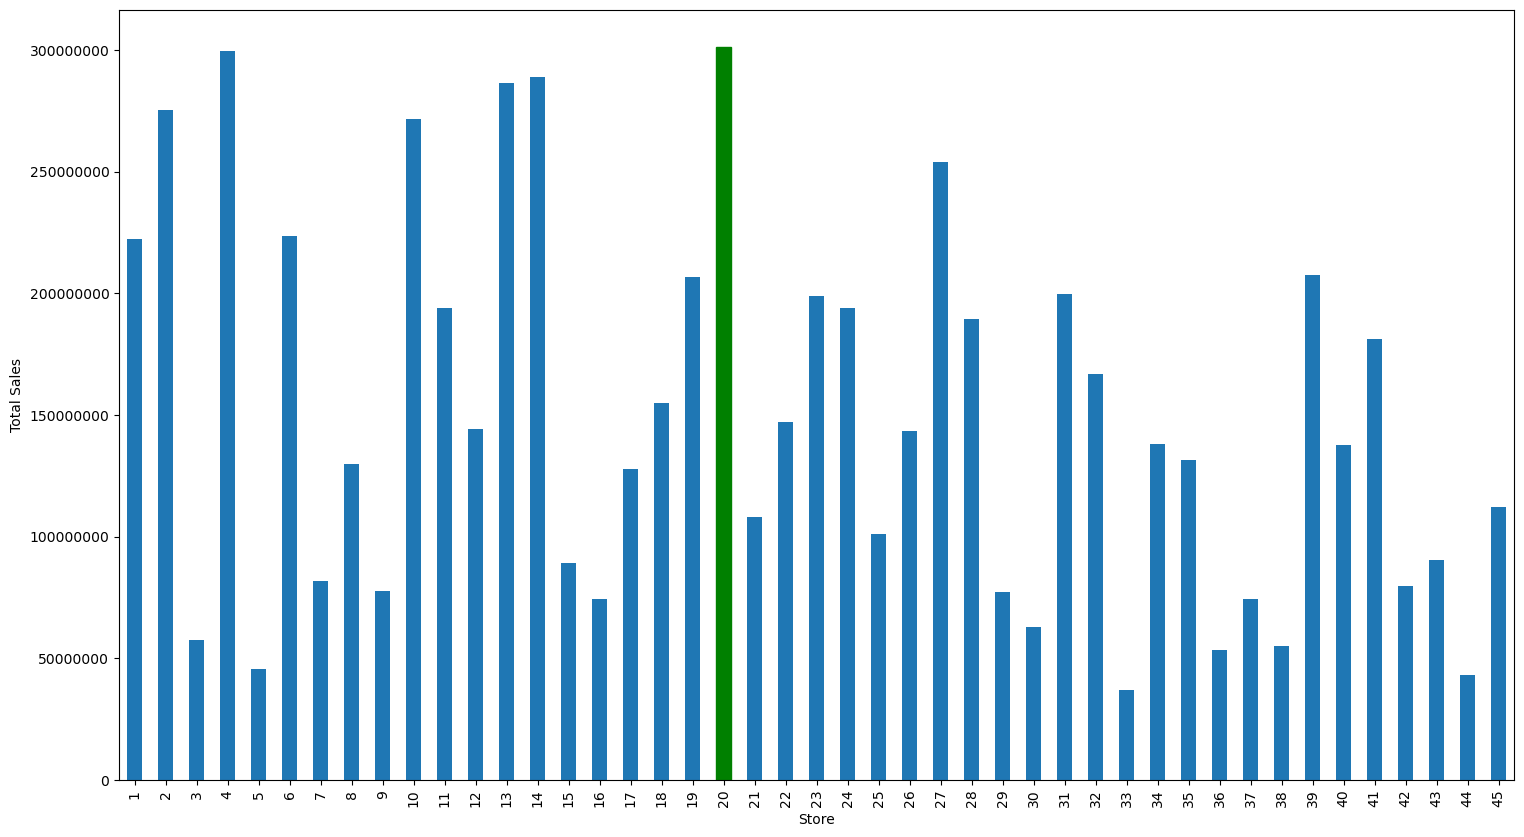

In [11]:
# The following line groups the data by store and calculates the total weekly sales for each store, 
# then sorts the results.

eachStore_totalSales =df.groupby('Store')['Weekly_Sales'].sum().sort_index()

store_with_maxSales = eachStore_totalSales.idxmax()
maxSales = eachStore_totalSales[store_with_maxSales]

print(f'Store number {store_with_maxSales} has maximum sales of {maxSales}')

ax = eachStore_totalSales.plot(kind='bar',figsize = (18,10))

# Set the color of the max sales bar green
ax.containers[0][store_with_maxSales-1].set_color('g')

plt.ticklabel_format(style='plain', axis='y')

plt.xlabel('Store')
plt.ylabel('Total Sales')

plt.show()

### Task 2 : Which store has maximum standard deviation i.e., the sales vary a lot. 
### Also, find out the coefficient of mean to standard deviation

Store number 14 has maximum standard deviation of 317570 $


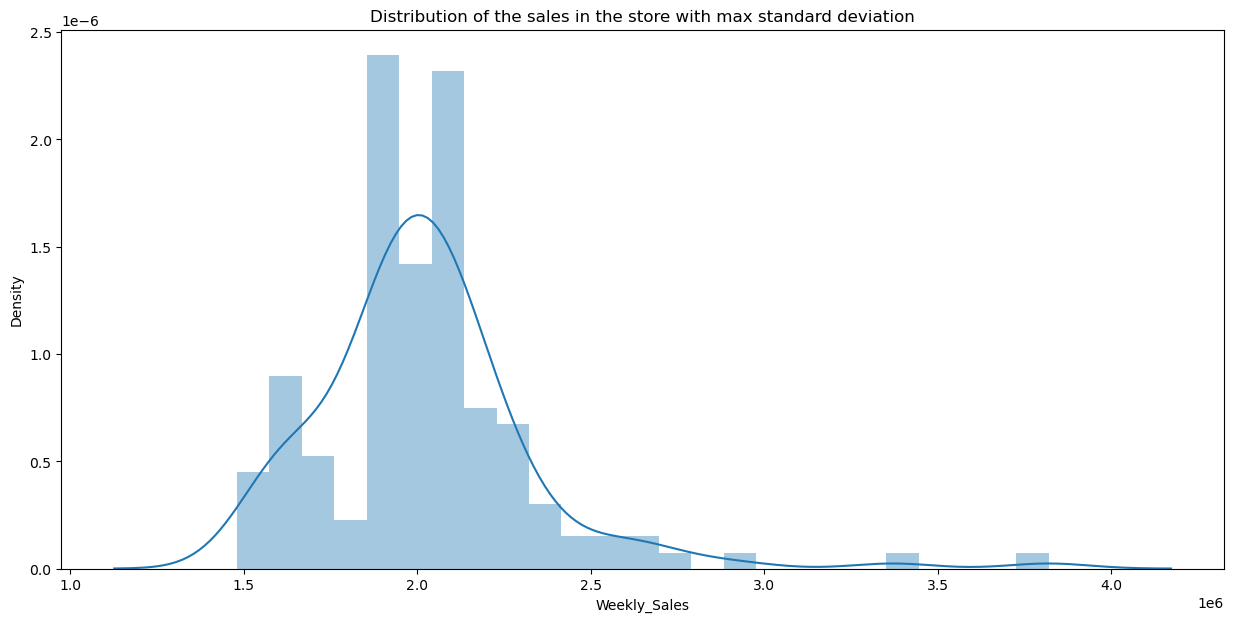

In [12]:
# Find store has maximum standard deviation
eachStore_std = df.groupby('Store')['Weekly_Sales'].std().sort_index()

store_with_maxStd = eachStore_std.idxmax()
maxStd = eachStore_std[store_with_maxStd]

print('Store number {} has maximum standard deviation of {:.0f} $'.format(store_with_maxStd,maxStd))

plt.figure(figsize = (15,7))

sns.distplot(df[df['Store']== 14]['Weekly_Sales'])
plt.title('Distribution of the sales in the store with max standard deviation')

plt.show()

In [13]:
# find out the coefficient of mean to standard deviation(coefficient of variation)
coeff_var = (df.groupby('Store')['Weekly_Sales'].std())/(df.groupby('Store')['Weekly_Sales'].mean())
print('Store {} has coefficient of variation as {}'.format(store_with_maxStd,coeff_var[store_with_maxStd]))


Store 14 has coefficient of variation as 0.15713673600948333


### Task 3 : Which store/s has good quarterly growth rate in Q3’2012
##### Quarterly Growth Rate = ((Current Quarter Value - Previous Quarter Value) / Previous Quarter Value) * 100

Store 7 has good quarterly growth rate in Q3’2012


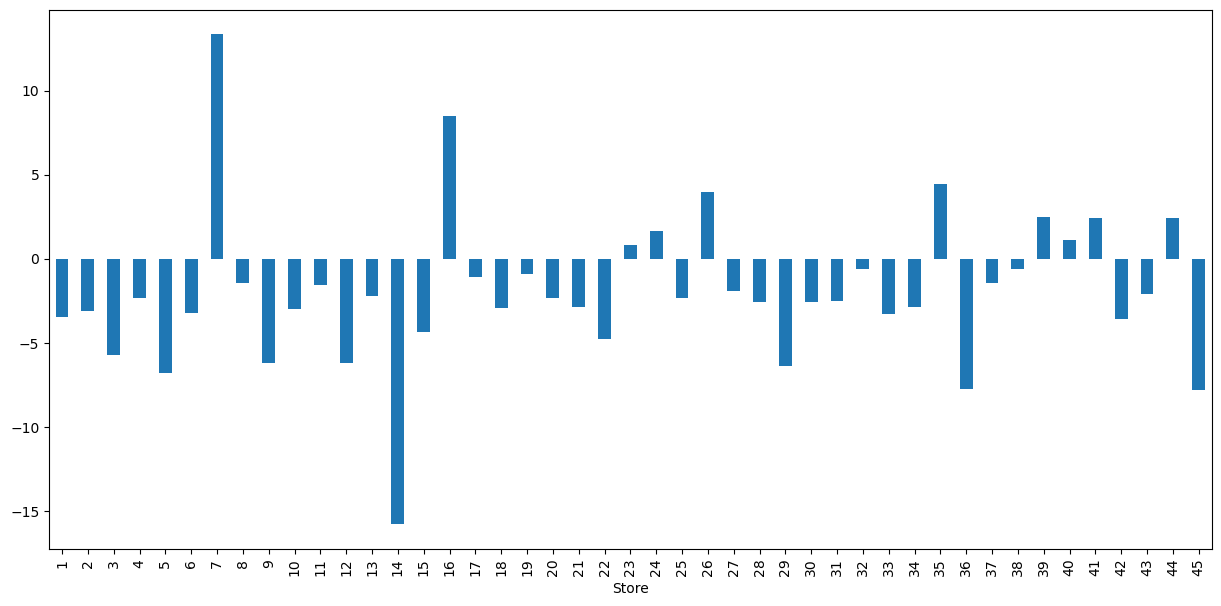

In [14]:
# Find Current Quarter Value i.e.,Q3

Q3_sales = df[(df['Date'] > '2012-07-01') & (df['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

Q2_sales = df[(df['Date'] > '2012-04-01') & (df['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()


Quarterly_Growth_Rate  = ((Q3_sales- Q2_sales)/Q2_sales) * 100

store_max_growth_Q3 = Quarterly_Growth_Rate.idxmax() 
store_max_growth_Q3

Quarterly_Growth_Rate.plot(kind='bar',figsize=(15,7))
print('Store {} has good quarterly growth rate in Q3’2012'.format(store_max_growth_Q3))

### Task 4 : Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Holidays:

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [15]:
# Non holiday mean sales
non_holiday_mean_sales = (df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean())#.mean()
non_holiday_mean_sales

1041256.3802088564

In [16]:
# Holidays

SB_holidays = ['2010-02-12','2011-02-11','2012-02-10','2013-02-08']
LD_holidays = ['2010-09-10','2011-09-09','2012-09-07','2013-09-06']
TG_holidays = ['2010-11-26','2011-11-25','2012-11-23','2013-11-29']
Ch_holidays = ['2010-12-31','2011-12-30','2012-12-28','2013-12-27']

In [17]:
# Find indices of the holidays separately
index_SB_holidays = np.array(df.loc[df['Date'].isin(SB_holidays)].index.tolist())
index_LD_holidays = np.array(df.loc[df['Date'].isin(LD_holidays)].index.tolist())
index_TG_holidays = np.array(df.loc[df['Date'].isin(TG_holidays)].index.tolist())
index_Ch_holidays = np.array(df.loc[df['Date'].isin(Ch_holidays)].index.tolist())

In [18]:
# Find mean sales in holidays
mean_SB = df.loc[index_SB_holidays]['Weekly_Sales'].mean()
mean_LD = df.loc[index_LD_holidays]['Weekly_Sales'].mean()
mean_TG = df.loc[index_TG_holidays]['Weekly_Sales'].mean()
mean_Ch = df.loc[index_Ch_holidays]['Weekly_Sales'].mean()

holiday which has higher sales than the mean sales in non-holiday season for all stores together is Thanksgiving


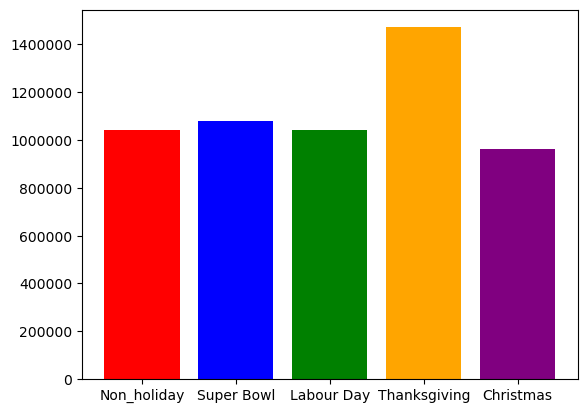

In [19]:
values = [non_holiday_mean_sales,mean_SB,mean_LD,mean_TG,mean_Ch]
x_labels = ['Non_holiday','Super Bowl','Labour Day','Thanksgiving','Christmas']
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.bar(range(len(values)),values,color=colors)

# Set the x-tick labels
plt.xticks(range(len(values)), x_labels)
plt.ticklabel_format(style='plain', axis='y')

# Find the index of the maximum value
max_idx = np.argmax(values)

# Get the corresponding x-value
max_x = x_labels[max_idx]

# Print the result
print(f"holiday which has higher sales than the mean sales in non-holiday season for all stores together is {max_x}")

plt.show()

### Task 5 : Provide a monthly and semester view of sales in units and give insights

In [20]:
# extract the month and quarter into separate columns

df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter
df['year'] = df['Date'].dt.year
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,quarter,year
0,1,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,2,1,2010
1,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,2,1,2010
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,2,1,2010
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,2,1,2010
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,3,1,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.950,0,64.880,3.997,192.014,8.684,9,3,2012
6431,45,2012-10-05,733455.070,0,64.890,3.985,192.170,8.667,10,4,2012
6432,45,2012-10-12,734464.360,0,54.470,4.000,192.327,8.667,10,4,2012
6433,45,2012-10-19,718125.530,0,56.470,3.969,192.331,8.667,10,4,2012


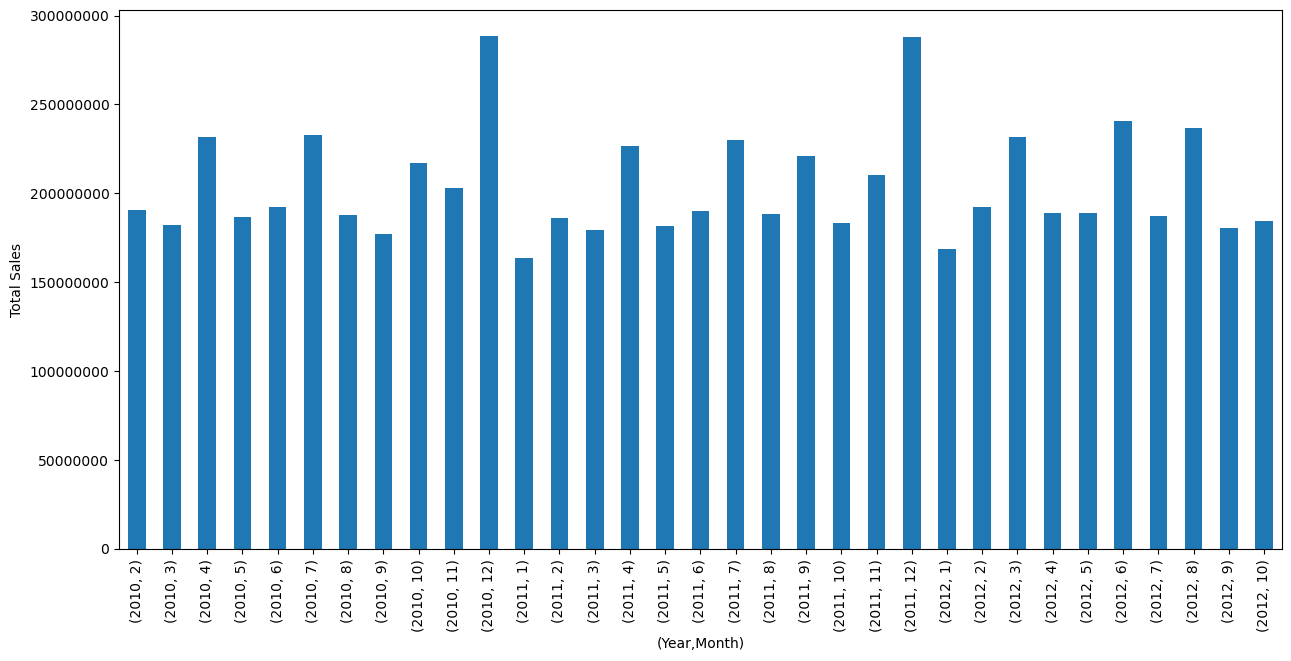

In [21]:
# Monthly view of sales

df_monthly = df.groupby([df['year'],df['month']])['Weekly_Sales'].sum()

df_monthly.plot(kind='bar',figsize = (15,7))

plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('(Year,Month)')
plt.ylabel('Total Sales')
plt.show()

### <span style="color:green" >"According to our sales data analysis, December has recorded the highest total sales compared to the other months."</span>

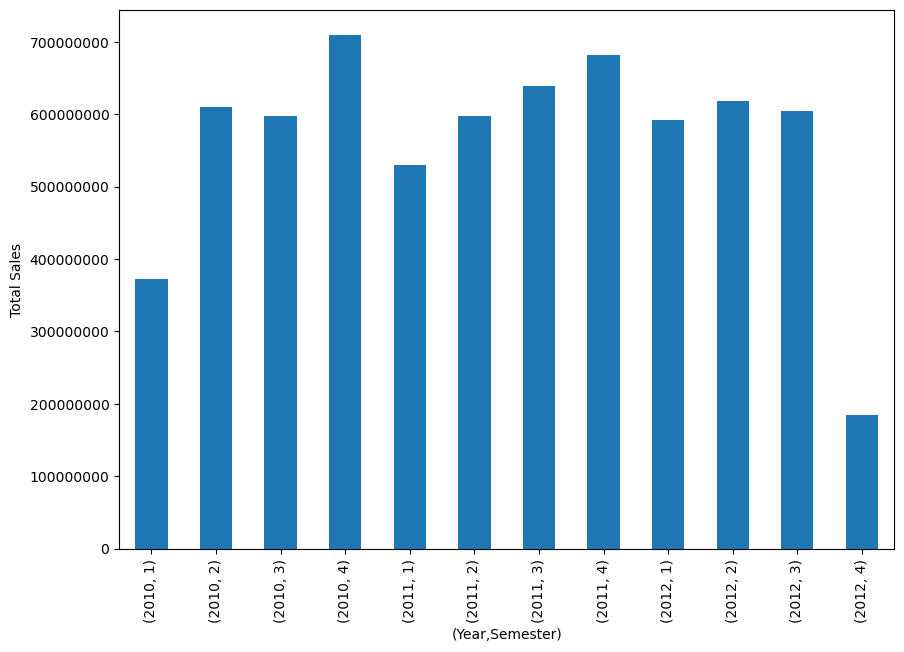

In [22]:
#   semester view of sales

df_semester = df.groupby([df['year'],df['quarter']])['Weekly_Sales'].sum()
df_semester.plot(kind='bar',figsize = (10,7))

plt.ticklabel_format(style='plain',axis='y')
plt.xlabel('(Year,Semester)')
plt.ylabel('Total Sales')
plt.show()

### <span style="color:green" >Insight :  "Based on the analysis, it is evident that the fourth quarter of the year has recorded the highest sales, mainly driven by the months of November and December. This observation is supported by the graphical representation of the data, which reveals a significant decrease in sales during those two months in the year 2012, as the data for November and December is missing. In contrast, the second quarter has demonstrated a stable trend in sales."</span> ###

### Statistical Model

#### For Store 1 – Build prediction models to forecast demand 
1. Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.
2. Change dates into days by creating new variable.

In [23]:
df =data.copy()

In [24]:
# To Change dates into days
df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter
df['year'] = df['Date'].dt.year


df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,quarter,year
0,1,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,5,2,1,2010
1,1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,12,2,1,2010
2,1,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,19,2,1,2010
3,1,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,26,2,1,2010
4,1,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,5,3,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.950,0,64.880,3.997,192.014,8.684,28,9,3,2012
6431,45,2012-10-05,733455.070,0,64.890,3.985,192.170,8.667,5,10,4,2012
6432,45,2012-10-12,734464.360,0,54.470,4.000,192.327,8.667,12,10,4,2012
6433,45,2012-10-19,718125.530,0,56.470,3.969,192.331,8.667,19,10,4,2012


In [25]:
# Store 1 data

df_store1 = df[df['Store']==1]
df_store1.drop(columns=['Store'],inplace=True)
df_store1

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,quarter,year
0,2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,5,2,1,2010
1,2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,12,2,1,2010
2,2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,19,2,1,2010
3,2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,26,2,1,2010
4,2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,5,3,1,2010
...,...,...,...,...,...,...,...,...,...,...,...
138,2012-09-28,1437059.260,0,76.080,3.666,222.982,6.908,28,9,3,2012
139,2012-10-05,1670785.970,0,68.550,3.617,223.181,6.573,5,10,4,2012
140,2012-10-12,1573072.810,0,62.990,3.601,223.381,6.573,12,10,4,2012
141,2012-10-19,1508068.770,0,67.970,3.594,223.426,6.573,19,10,4,2012


In [26]:
# Indexing with Time series data
df_store1 = df_store1.set_index('Date')
df_store1.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

<Axes: xlabel='Date'>

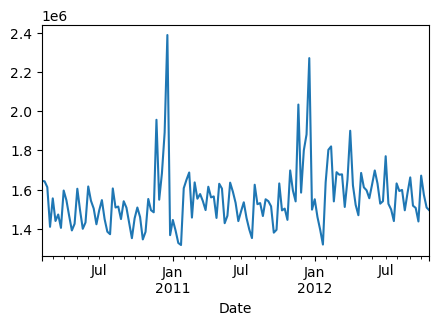

In [27]:
# Visualize Sales Time series data
y = df_store1['Weekly_Sales']
y.plot(figsize = (5,3))

* There is an upward trend in any single year

# Time series decomposition to decompose data into three components: trend, seasonality, noise

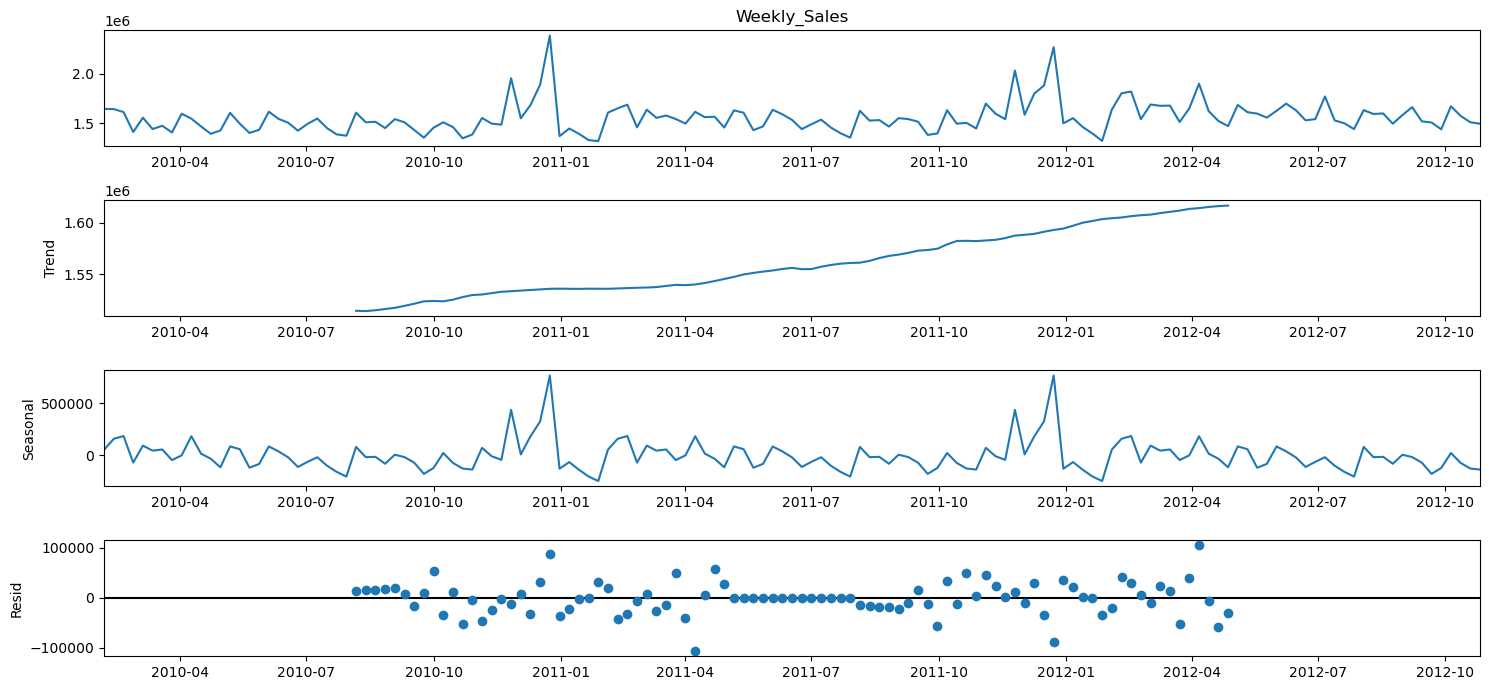

In [28]:
rcParams['figure.figsize']=15,7
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

* The trend component shows that there is an increase

#### Before Linear regression, we need to preprocess the data

 Step 1: Clean the data

In [29]:
# Remove missing values rows

df_store1 = df_store1.dropna()   


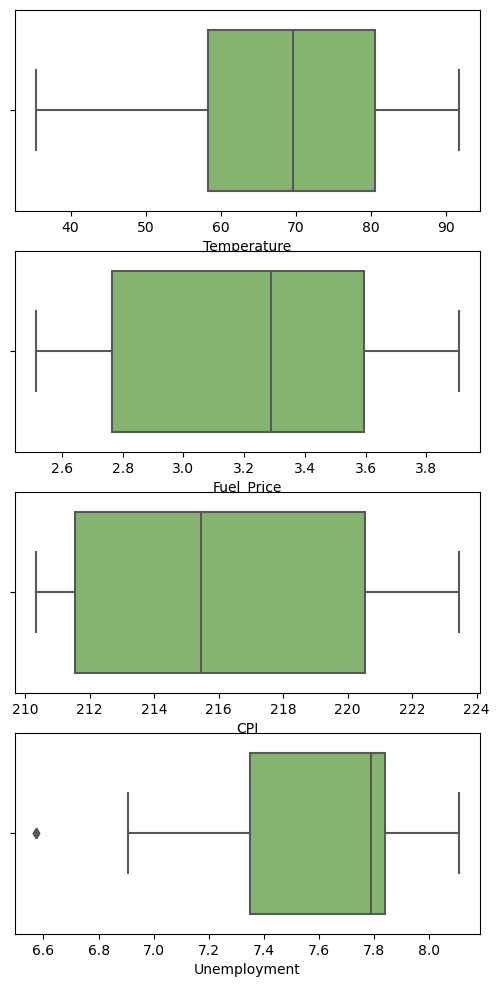

In [30]:
#  Visualize and Remove outlier
fig,axs = plt.subplots(4, figsize = (6,12))
column_plot = df_store1[['Temperature','Fuel_Price','CPI','Unemployment']]
plt.ticklabel_format(style='plain',axis='x')
for i, column in enumerate(column_plot):
    sns.boxplot(x=column, data=df_store1, ax=axs[i],palette='summer')
    axs[i].set_xlabel(column)

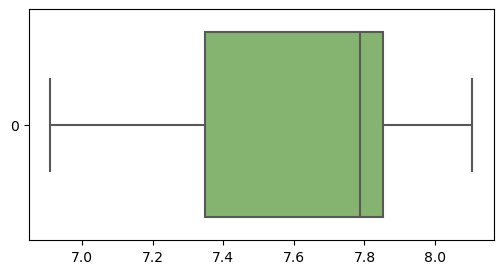

In [31]:
# Remove outliers

df_store1 = df_store1[df_store1['Unemployment']>6.9]
fig,ax = plt.subplots(figsize=(6,3))
sns.boxplot(df_store1['Unemployment'],orient='h',palette='summer',ax=ax)
plt.show()

In [32]:
df_store1

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,quarter,year
Date,,,,,,,,,,
2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,5,2,1,2010
2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,12,2,1,2010
2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,19,2,1,2010
2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,26,2,1,2010
2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,5,3,1,2010
...,...,...,...,...,...,...,...,...,...,...
2012-08-31,1582083.400,0,80.490,3.638,222.305,6.908,31,8,3,2012
2012-09-07,1661767.330,1,83.960,3.730,222.439,6.908,7,9,3,2012
2012-09-14,1517428.870,0,74.970,3.717,222.582,6.908,14,9,3,2012


In [33]:
# Remove duplicate rows if any

df_store1= df_store1.drop_duplicates()

2. Explore the data

  EDA is to understand how the variables in this dataset relate to the sales.

[Text(0.5, 0, 'Sales'), Text(0, 0.5, 'weeks')]

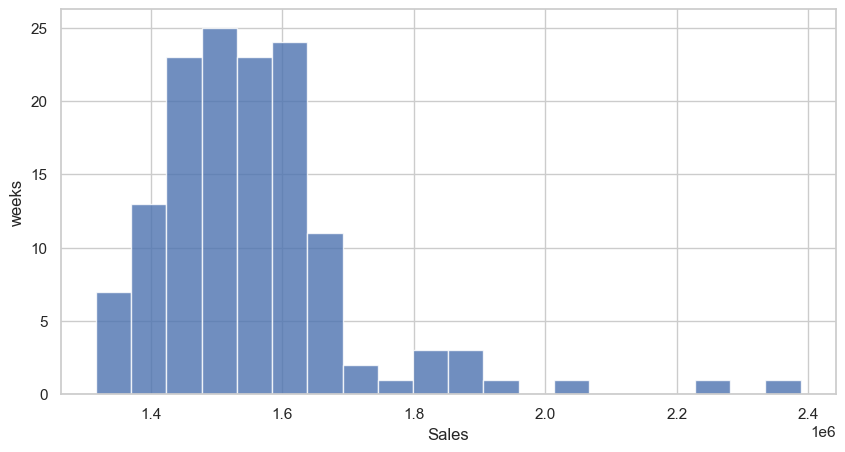

In [34]:
# To understand what values the numerical variables can take,the distribution and dispersion. This can be achieved with
# a histogram

sns.set(style = 'whitegrid',rc = {"figure.figsize":(10,5)})
sns.distplot(df_store1['Weekly_Sales'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 0.8}).set(xlabel='Sales',ylabel='weeks') 

<span style = "color:red" >Taking a look at the histogram, Most of the weeks have sales around 1400000 to 1700000 $ </span>

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

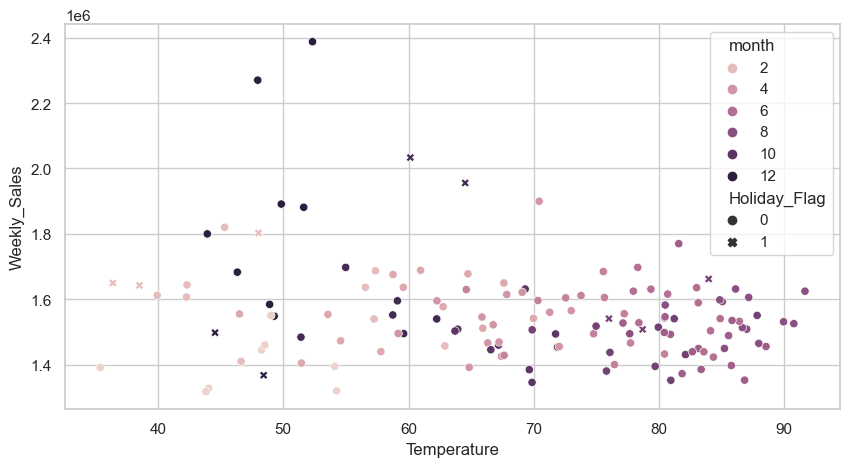

In [35]:
# analysing the relation between numerical vars

sns.scatterplot(data=df_store1, x='Temperature', y='Weekly_Sales', hue='month', style='Holiday_Flag')

* Month and Temperature have a little influence on Sales

In [36]:
df_store1

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,day,month,quarter,year
Date,,,,,,,,,,
2010-02-05,1643690.900,0,42.310,2.572,211.096,8.106,5,2,1,2010
2010-02-12,1641957.440,1,38.510,2.548,211.242,8.106,12,2,1,2010
2010-02-19,1611968.170,0,39.930,2.514,211.289,8.106,19,2,1,2010
2010-02-26,1409727.590,0,46.630,2.561,211.320,8.106,26,2,1,2010
2010-03-05,1554806.680,0,46.500,2.625,211.350,8.106,5,3,1,2010
...,...,...,...,...,...,...,...,...,...,...
2012-08-31,1582083.400,0,80.490,3.638,222.305,6.908,31,8,3,2012
2012-09-07,1661767.330,1,83.960,3.730,222.439,6.908,7,9,3,2012
2012-09-14,1517428.870,0,74.970,3.717,222.582,6.908,14,9,3,2012


<Axes: xlabel='CPI', ylabel='Weekly_Sales'>

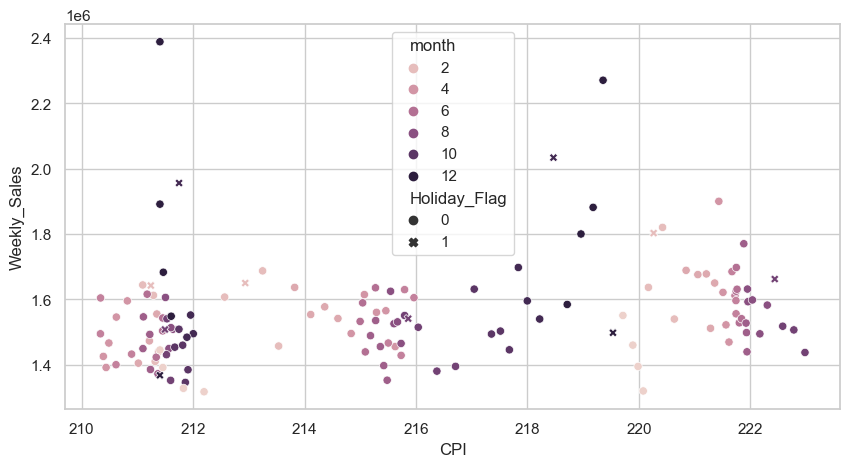

In [37]:
sns.scatterplot(data=df_store1, x='CPI', y='Weekly_Sales', hue='month', style='Holiday_Flag')

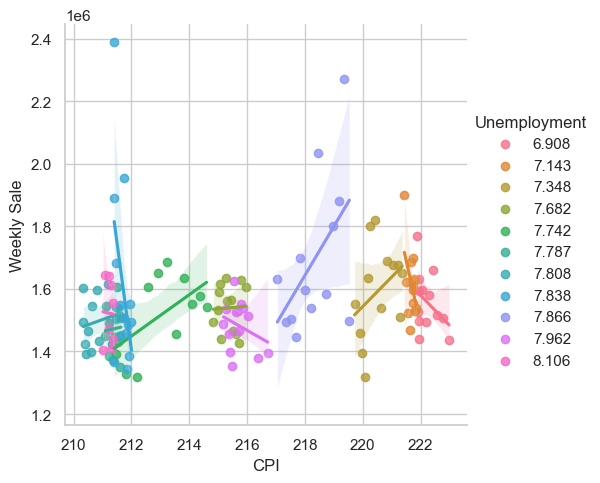

In [38]:
sns.lmplot(x='CPI', y='Weekly_Sales', hue='Unemployment', data=df_store1)
plt.ylabel("Weekly Sale")
plt.xlabel("CPI");

* CPI and Unemployment together have influence on sales 

<Axes: xlabel='Fuel_Price', ylabel='Weekly_Sales'>

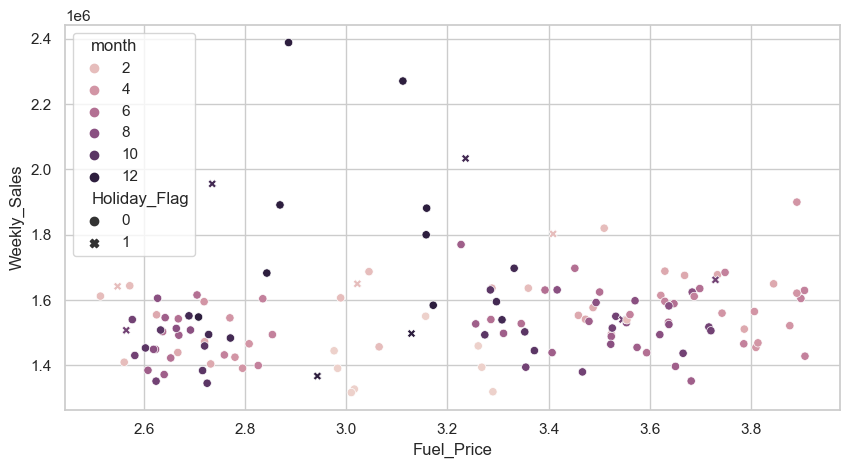

In [39]:
sns.scatterplot(data=df_store1, x='Fuel_Price', y='Weekly_Sales', hue='month', style='Holiday_Flag')

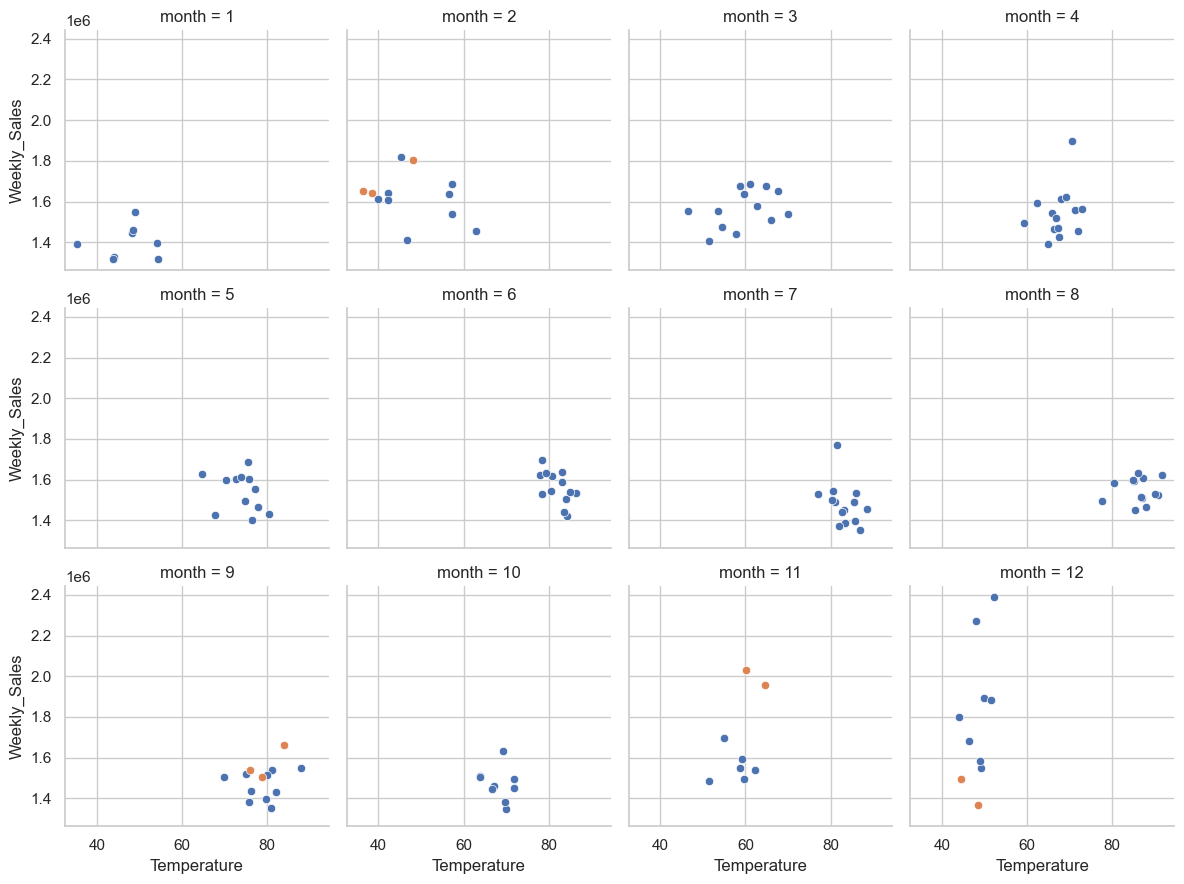

In [40]:
cond_plot = sns.FacetGrid(data=df_store1, col='month', hue='Holiday_Flag', col_wrap=4)
cond_plot.map(sns.scatterplot, 'Temperature', 'Weekly_Sales');

<span style="color:blue"> Based on the plot, it appears that although holidays typically exhibit higher sales, there is an exception in December. In this month, sales during holidays appear to be lower than expected.</span>

In [41]:
df_store1['Unemployment_CPI'] = df_store1.Unemployment * df_store1.CPI
df_store1['Unemployment_Temp'] = df_store1.Unemployment * df_store1.Temperature
df_store1['CPI_Temp'] = df_store1.Temperature * df_store1.CPI

3. Scale the data

In [42]:
scaler = StandardScaler()
df_store1[['Weekly_Sales','Temperature','CPI','Unemployment','Fuel_Price','Unemployment_CPI','Unemployment_Temp','CPI_Temp']] = scaler.fit_transform(df_store1[['Weekly_Sales','Temperature','CPI','Unemployment','Fuel_Price','Unemployment_CPI','Unemployment_Temp','CPI_Temp']])

In [43]:
df_store1.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'day', 'month', 'quarter', 'year', 'Unemployment_CPI',
       'Unemployment_Temp', 'CPI_Temp'],
      dtype='object')

4. Split the data into training and testing

In [44]:

X = df_store1[['Temperature','CPI','Unemployment','Fuel_Price','day', 'month','Unemployment','Unemployment_CPI','Unemployment_Temp','CPI_Temp']]


y = df_store1['Weekly_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
reg = LinearRegression()
reg.fit(X_train, y_train)


Intercept=reg.intercept_
Coefficients=reg.coef_

print('Intercept:' ,Intercept)

print('Coefficients:',Coefficients)


X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

Intercept: -0.28075702816461934
Coefficients: [ 3.97294175  1.07080736  1.12215125  0.19417193 -0.03315754  0.1213876
  1.12215125 -1.47492267 -1.5070578  -2.84531032]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     6.070
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           4.38e-07
Time:                        18:46:20   Log-Likelihood:                -172.69
No. Observations:                 139   AIC:                             365.4
Df Residuals:                     129   BIC:                             394.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0760      0.235     -0.323      0.747      -0.542       0.390
Temperature          20.0863     10.255      1.959      0.052      -0.202      40.375
CPI                  -0.4340      4.626     -0.094      0.925      -9.586       8.718
Unemployment         -1.2714      5.007     -0.254      0.800     -11.177       8.634
Fuel_Price            0.2223      0.170      1.304      0.195      -0.115       0.560
day                  -0.0303      0.008     -3.596      0.000      -0.047      -0.014
month                 0.0869      0.029      3.047      0.003       0.030       0.143
Unemployment         -1.2714      5.007     -0.254      0.800     -11.177       8.634
Unemployment_CPI      2.8493      7.178      0.397      0.692     -11.353      17.052
Unemployment_Temp    -7.0025      3.384     -2.069      0.040     -13.697      -0.308
CPI_Temp            -13.5146      7.917     -1.707      0.090     -29.179       2.150
==============================================================================
Omnibus:                       96.392   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.663
Skew:                           2.373   Prob(JB):                    1.51e-171
Kurtosis:                      13.644   Cond. No.                     6.59e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.14e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: >

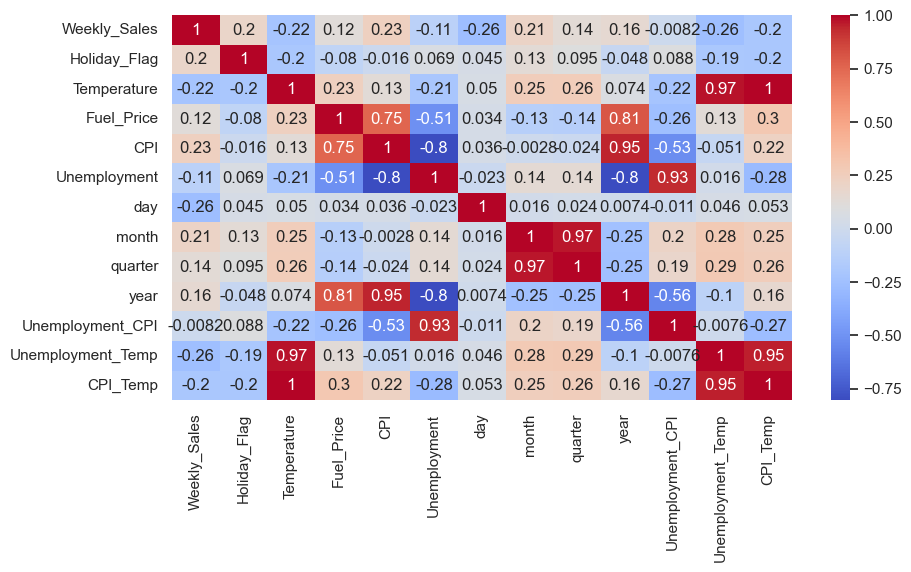

In [45]:
corr_matrix = df_store1.corr()
# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')


In [46]:
df_store1 = df_store1.drop(columns=['CPI_Temp','Unemployment_Temp','Unemployment','year'])

In [49]:
df_store1

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,day,month,quarter,Unemployment_CPI
Date,,,,,,,,,
2010-02-05,0.564,0,-1.808,-1.491,-1.113,5,2,1,1.191
2010-02-12,0.553,1,-2.072,-1.547,-1.079,12,2,1,1.213
2010-02-19,0.362,0,-1.973,-1.627,-1.068,19,2,1,1.220
2010-02-26,-0.925,0,-1.508,-1.517,-1.060,26,2,1,1.225
2010-03-05,-0.002,0,-1.517,-1.367,-1.053,5,3,1,1.230
...,...,...,...,...,...,...,...,...,...
2012-08-31,0.172,0,0.844,1.003,1.548,31,8,3,-2.092
2012-09-07,0.679,1,1.085,1.218,1.580,7,9,3,-2.075
2012-09-14,-0.240,0,0.461,1.188,1.614,14,9,3,-2.056


In [50]:
X=df_store1[['Temperature','CPI','Fuel_Price','day', 'month','Unemployment_CPI','quarter','Holiday_Flag']]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
reg = LinearRegression()
reg.fit(X_train, y_train)


Intercept=reg.intercept_
Coefficients=reg.coef_

print('Intercept:' ,Intercept)

print('Coefficients:',Coefficients)


X = sm.add_constant(X)
est = sm.OLS(y,X).fit()
est.summary()

Intercept: 0.4636069218430674
Coefficients: [-0.12892386  0.51500563 -0.09153519 -0.03182578  0.11821801  0.15656111
 -0.31631118  0.5629196 ]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     7.419
Date:                Sat, 15 Apr 2023   Prob (F-statistic):           4.13e-08
Time:                        18:56:35   Log-Likelihood:                -171.09
No. Observations:                 139   AIC:                             360.2
Df Residuals:                     130   BIC:                             386.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1492      0.251      0.593      0.554      -0.348       0.646
Temperature         -0.3065      0.087     -3.517      0.001      -0.479      -0.134
CPI                  0.1782      0.143      1.244      0.216      -0.105       0.462
Fuel_Price           0.0983      0.128      0.767      0.445      -0.155       0.352
day                 -0.0299      0.008     -3.598      0.000      -0.046      -0.013
month                0.2988      0.092      3.241      0.002       0.116       0.481
Unemployment_CPI    -0.0348      0.100     -0.348      0.728      -0.233       0.163
quarter             -0.6574      0.276     -2.378      0.019      -1.204      -0.110
Holiday_Flag         0.3738      0.296      1.265      0.208      -0.211       0.959
==============================================================================
Omnibus:                       90.995   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              684.776
Skew:                           2.230   Prob(JB):                    2.01e-149
Kurtosis:                      12.917   Cond. No.                         86.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""